In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

if "workding_dir" not in locals():
    try:
        from google.colab import drive
        drive.mount('/content/drive')
        workding_dir = "/content/drive/MyDrive/logical-reasoning/"
    except ModuleNotFoundError:
        workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
from llm_toolkit.logical_reasoning_utils import *

loading /Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py


In [6]:
model_name = "internlm2_5-7b-chat-1m"
result_csv = f"data/{model_name}_results.csv"
metrics_csv = f"data/{model_name}_metrics.csv"

In [7]:
import pandas as pd

df = pd.read_csv(result_csv)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                                                            Non-Null Count  Dtype 
---  ------                                                            --------------  ----- 
 0   text                                                              3000 non-null   object
 1   label                                                             3000 non-null   object
 2   title                                                             3000 non-null   object
 3   puzzle                                                            3000 non-null   object
 4   truth                                                             3000 non-null   object
 5   internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf                 3000 non-null   object
 6   internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf   3000 non-null   object
 7   internlm/internlm2_5-7b-chat-1m/checkpoint

In [8]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf',
 'internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf']

In [9]:
perf_df = get_metrics_df(df)
perf_df

/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/code/engd/projects/logical-reasoning/llm_toolkit/logical_reasoning_utils.py:343: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat(


epoch                                              model  accuracy  \
0     0.0  internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf  0.510667   
1     0.2  internlm/internlm2_5-7b-chat-1m/checkpoint-35_...  0.784333   
2     0.4  internlm/internlm2_5-7b-chat-1m/checkpoint-70_...  0.783667   
3     0.6  internlm/internlm2_5-7b-chat-1m/checkpoint-105...  0.724333   
4     0.8  internlm/internlm2_5-7b-chat-1m/checkpoint-140...  0.803000   
5     1.0  internlm/internlm2_5-7b-chat-1m/checkpoint-175...  0.767667   
6     1.2  internlm/internlm2_5-7b-chat-1m/checkpoint-210...  0.773667   
7     1.4  internlm/internlm2_5-7b-chat-1m/checkpoint-245...  0.762333   
8     1.6  internlm/internlm2_5-7b-chat-1m/checkpoint-280...  0.755333   
9     1.8  internlm/internlm2_5-7b-chat-1m/checkpoint-315...  0.748000   
10    2.0  internlm/internlm2_5-7b-chat-1m/checkpoint-350...  0.756000   

    precision    recall        f1  
0    0.743214  0.510667  0.535733  
1    0.797765  0.784333  0.786494  
2    0.799698  0.783667  0.788688  
3    0.817117  0.724333  0.756580  
4    0.803141  0.803000  0.802806  
5    0.810844  0.767667  0.784319  
6    0.809167  0.773667  0.787687  
7    0.806229  0.762333  0.777669  
8    0.808620  0.755333  0.775559  
9    0.817200  0.748000  0.773991  
10   0.812688  0.756000  0.777781

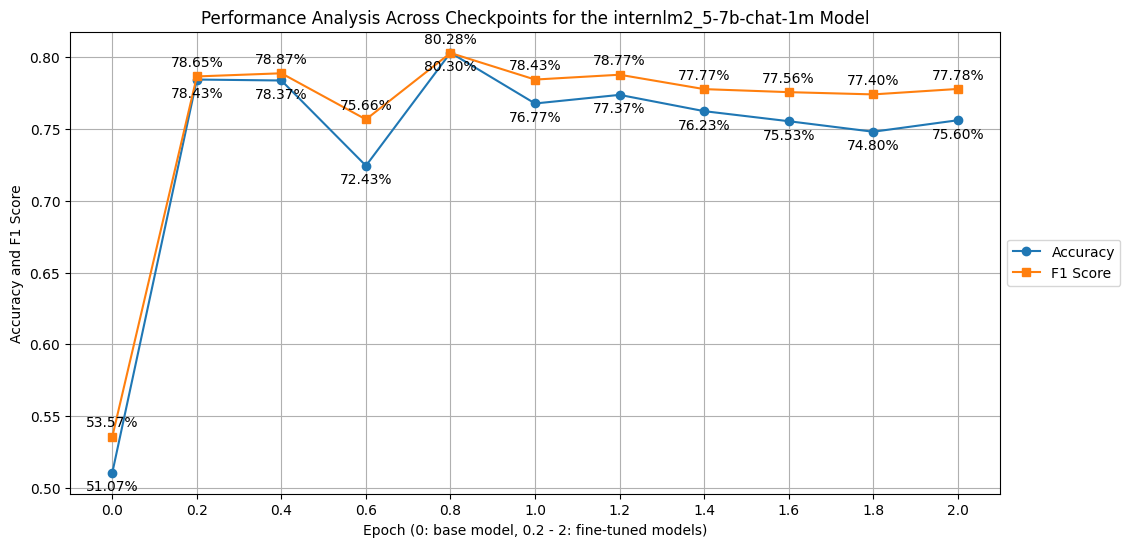

In [10]:
plot_metrics(perf_df, model_name)

In [11]:
perf_df.to_csv(metrics_csv, index=False)

********** internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m_torch.bfloat16_lf
是       1366
不重要     1165
不是       468
问法错误       1
Name: count, dtype: int64


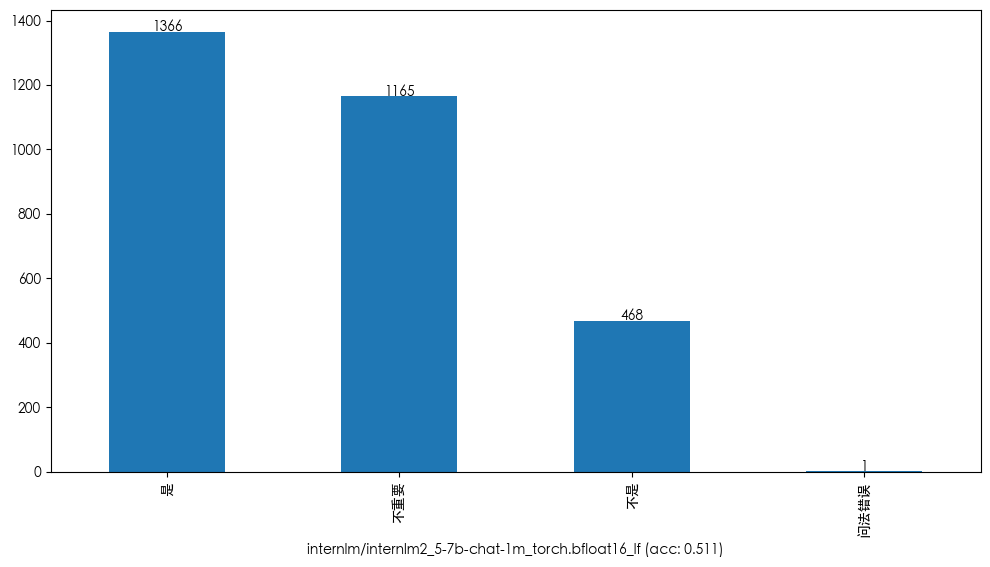

********** internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-35_torch.bfloat16_lf
是       1405
不是      1340
不重要      205
回答正确      31
问法错误      19
Name: count, dtype: int64


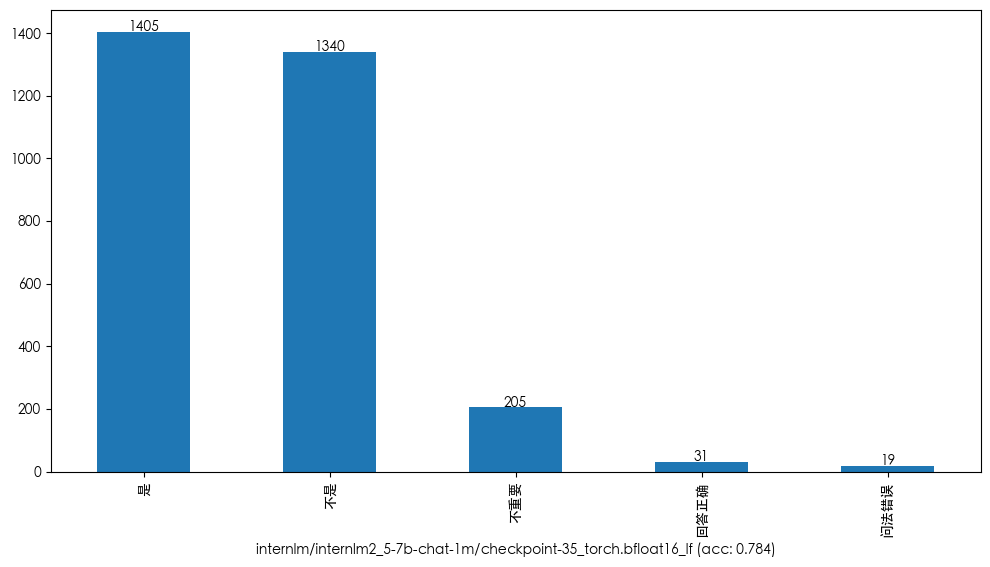

********** internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-70_torch.bfloat16_lf
不是      1421
是       1298
不重要      238
回答正确      24
问法错误      19
Name: count, dtype: int64


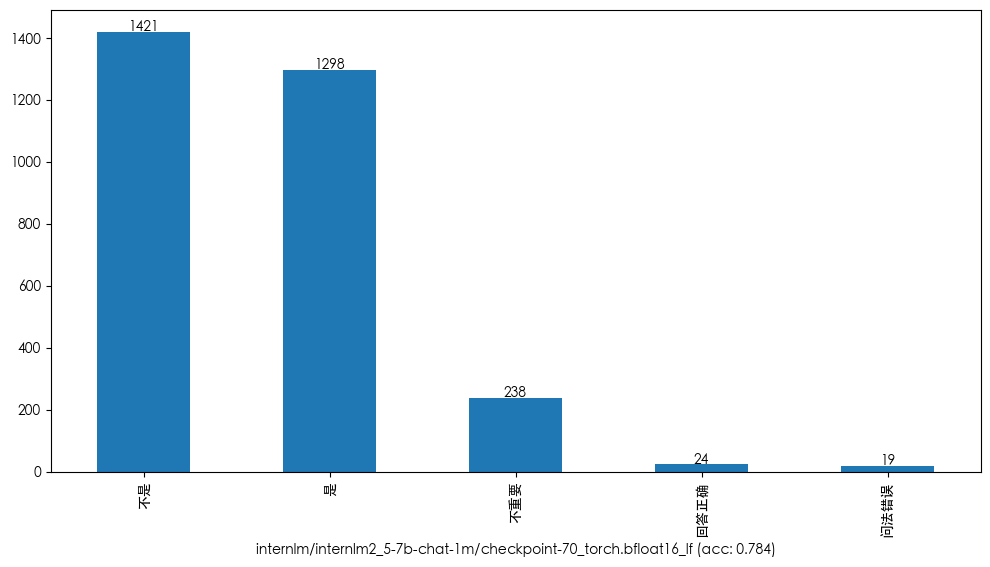

********** internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-105_torch.bfloat16_lf
是       1204
不是      1187
不重要      557
回答正确      32
问法错误      20
Name: count, dtype: int64


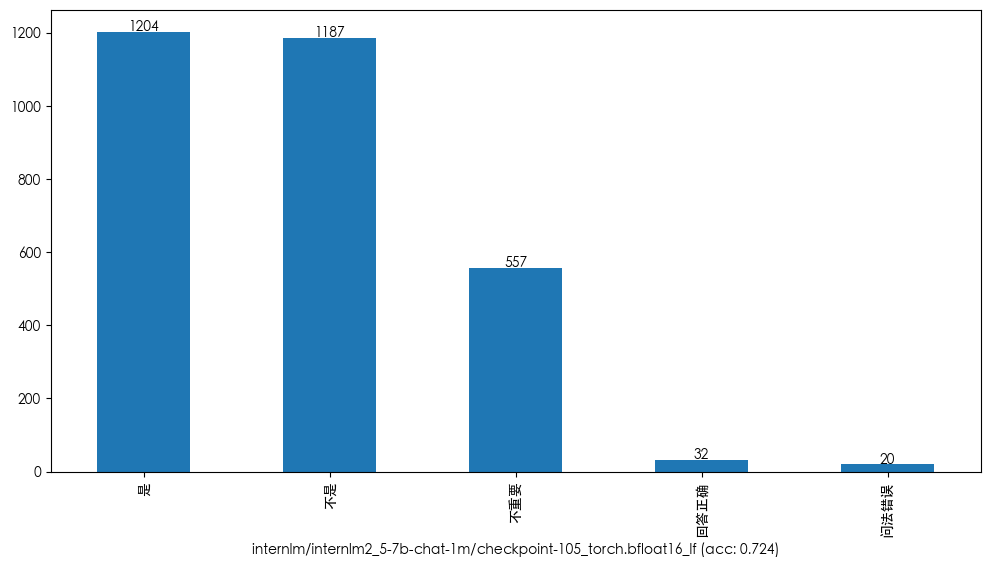

********** internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-140_torch.bfloat16_lf
不是      1565
是       1222
不重要      118
问法错误      62
回答正确      33
Name: count, dtype: int64


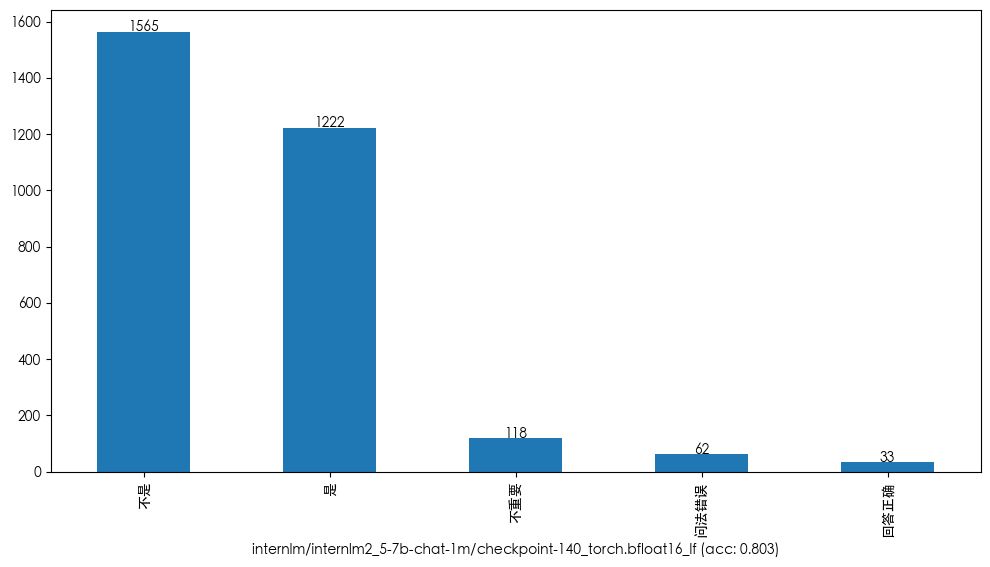

********** internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-175_torch.bfloat16_lf
不是      1457
是       1121
不重要      355
问法错误      34
回答正确      33
Name: count, dtype: int64


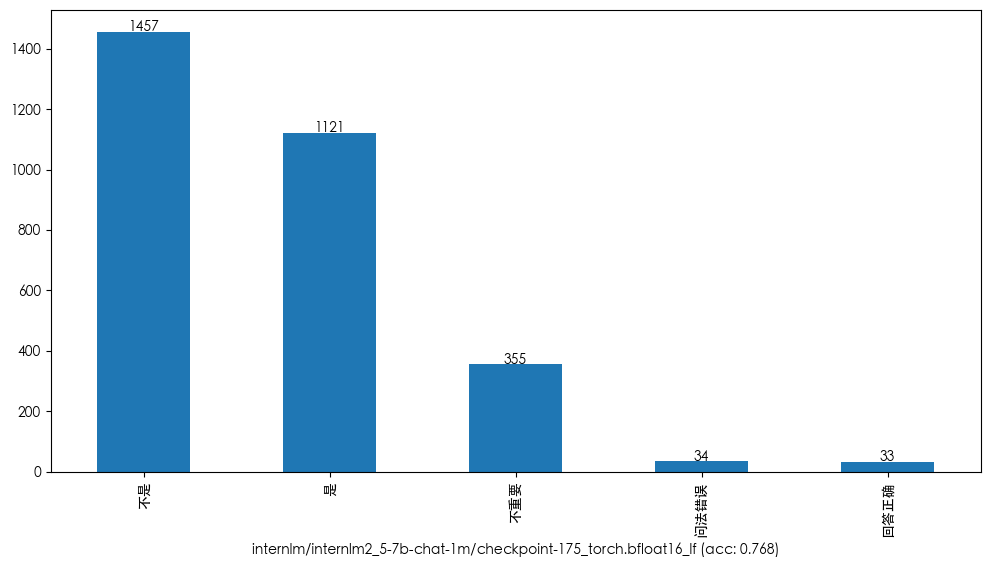

********** internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-210_torch.bfloat16_lf
不是      1364
是       1243
不重要      280
问法错误      79
回答正确      34
Name: count, dtype: int64


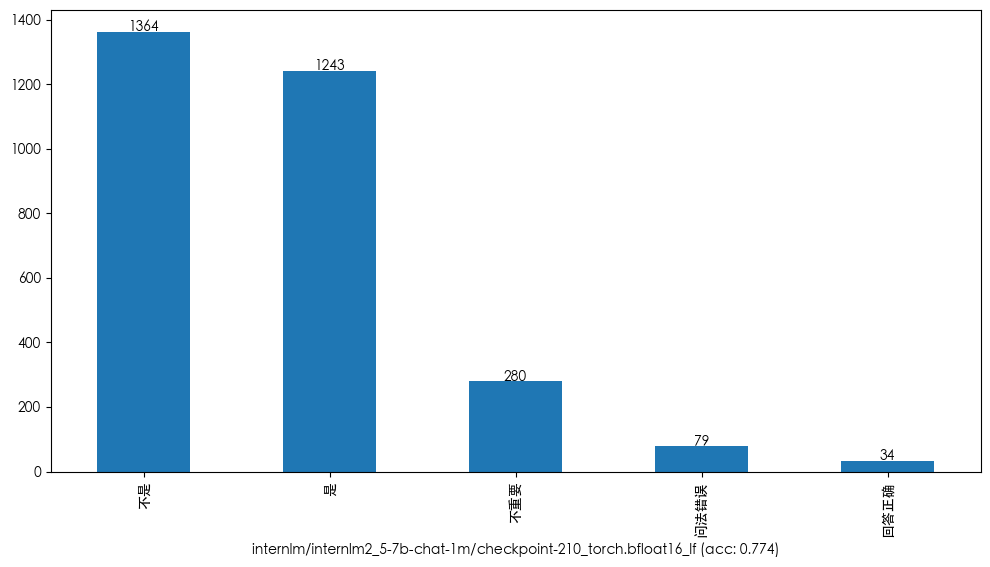

********** internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-245_torch.bfloat16_lf
是       1322
不是      1267
不重要      299
问法错误      82
回答正确      30
Name: count, dtype: int64


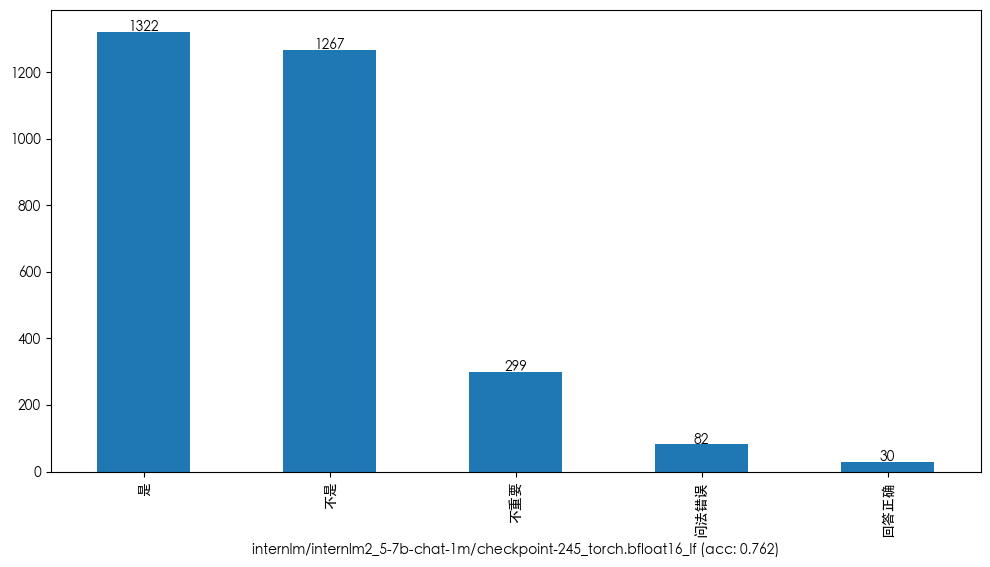

********** internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-280_torch.bfloat16_lf
不是      1304
是       1240
不重要      365
问法错误      64
回答正确      27
Name: count, dtype: int64


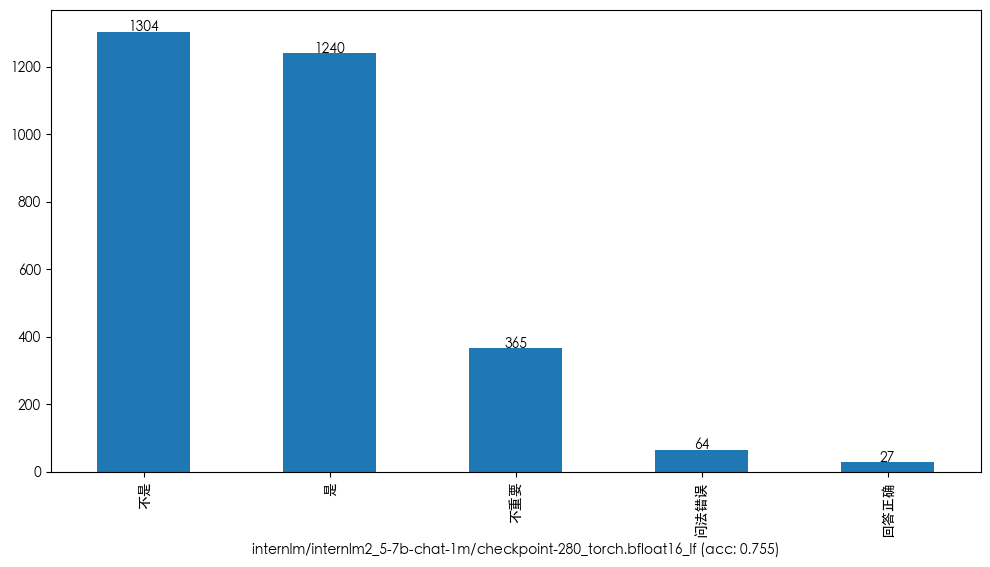

********** internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-315_torch.bfloat16_lf
不是      1290
是       1176
不重要      441
问法错误      60
回答正确      33
Name: count, dtype: int64


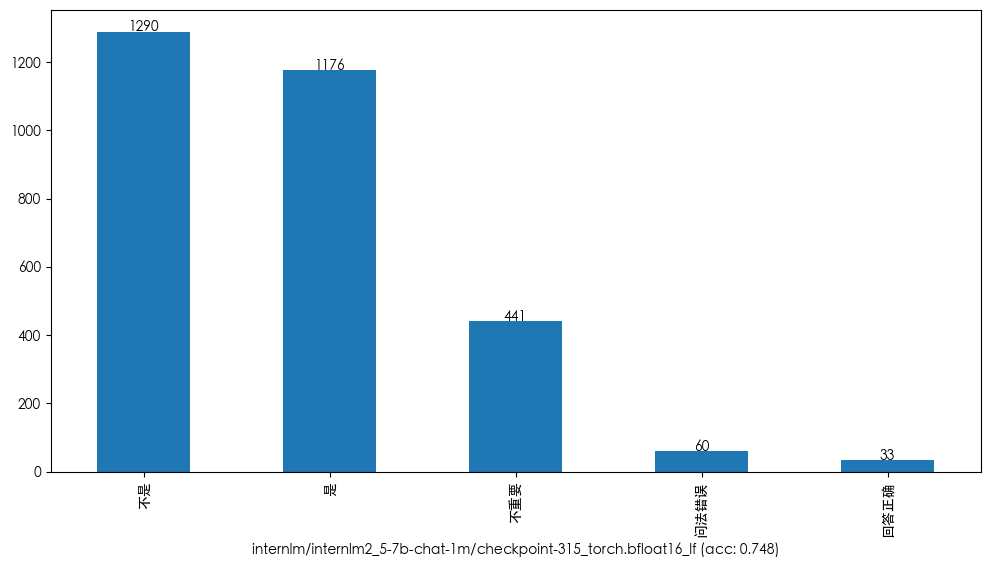

********** internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf **********
internlm/internlm2_5-7b-chat-1m/checkpoint-350_torch.bfloat16_lf
不是      1311
是       1211
不重要      388
问法错误      57
回答正确      33
Name: count, dtype: int64


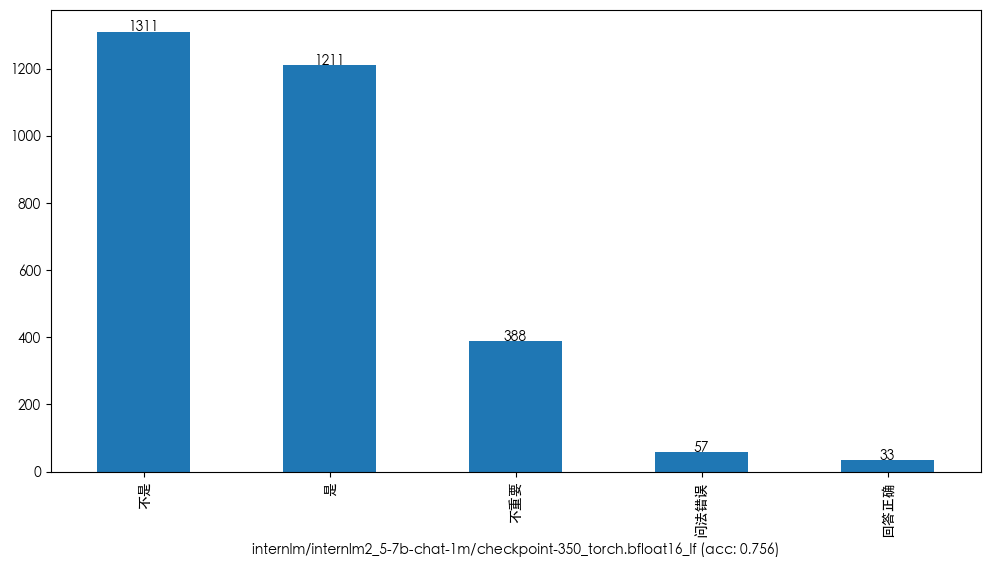

In [12]:
for col, accuracy in zip(df.columns[5:], perf_df["accuracy"].to_list()):
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col, f"{col} (acc: {accuracy:.3f})")